# Linear Programming 

$$
f(x) = \vec{c} \cdot \vec{x} = c_0 x_0 + c_1 x_1 + ...
$$ 
If we had to minimize a linear function by itself, the minimum would simply be off at some sort of infinity.  Linear Programming problems are often accompianied by many boundaries and inequalities.

In [2]:
import numpy as np
from scipy import optimize
import matplotlib.pyplot as plt

`linprog` only needs the vector `c`, but for plotting purposes, I create a function version as well.  There are a variety of different "dot-product" like functions in numpy, but `tensordot` in this way can handle all the plotting data at once.

In [59]:
c = [1,-2]

f = lambda x, c : np.tensordot(c,x,axes=(0,0))

## Bounds

$$
\begin{bmatrix} 0 \\ 0 \end{bmatrix} \leq
\begin{bmatrix} x_0 \\ x_1 \end{bmatrix} \leq
\begin{bmatrix} \infty \\ \infty \end{bmatrix}
$$

Bounds can also be written into the inequality constraints.

In [89]:
min_x0 = 0 
max_x0 = np.inf

min_x1 = 0
max_x1 = np.inf

bounds = ((min_x0,max_x0),(min_x1,max_x1))

## Inequality

$$
A_{ub} x \leq b_{ub}
$$
$$
\begin{bmatrix}
a_{00} & a_{01} \\ a_{10} & a_{11} 
\end{bmatrix} \begin{bmatrix}
x_0 \\ x_1 \end{bmatrix} 
\leq \begin{bmatrix}
b_{0} \\ b_{1} \end{bmatrix}
$$

$$ 
x_1 \leq -\frac{1}{2} x_0 + 5 \qquad x_1 \geq 3 x_0 -10
$$ 

$$
\begin{bmatrix}
x_0  + 2 x_1 \\ 3 x_0 - x_1 
\end{bmatrix}= \begin{bmatrix}
1 & 2 \\ 3 & -1 
\end{bmatrix} \begin{bmatrix}
x_0 \\ x_1
\end{bmatrix} \leq \begin{bmatrix}
10 \\ 10 \end{bmatrix}
$$

If we were to include the bounds, we could write

$$
\begin{bmatrix}
x_0  + 2 x_1 \\ 3 x_0 - x_1 \\ - x_0 \\ - x_1 
\end{bmatrix}= \begin{bmatrix}
1 & 2 \\ 3 & -1 \\ - 1 & 0 \\ 0 & -1 
\end{bmatrix} \begin{bmatrix}
x_0 \\ x_1
\end{bmatrix} \leq \begin{bmatrix}
10 \\ 10 \\ 0 \\ 0 \end{bmatrix}
$$

In [78]:
A_ub = [[1,2],[3,-1]]
b_ub = [10, 10]

In [80]:
np.array(A_ub) @ np.array([1,1]) <= b_ub

array([ True,  True])

In [4]:
# Coordinates for plotting
x0 = np.arange(-1,5,.01)
x1 = np.arange(-1,5,.01)
# creating 2D array
x0_a, x1_a = np.meshgrid(x0,x1)

No handles with labels found to put in legend.


Text(0, 0.5, 'x[1]')

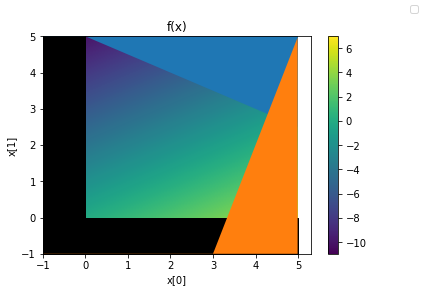

In [76]:
fig, ax = plt.subplots()
pos = ax.pcolormesh(x0_a,x1_a,f([x0_a,x1_a],c))

ax.fill_betweenx([-1,5],-1,0,color='k')
ax.fill_betweenx([-1,0],-1,5,color='k')

ax.fill_between(x0,-1/2*x0+5,5)
ax.fill_between(x0,3*x0-10,-1)

# labeling and measuring necessities
ax.set_ylim((-1,5))
fig.legend()
fig.colorbar(pos,ax=ax)
ax.set_title('f(x)')
ax.set_xlabel('x[0]')
ax.set_ylabel('x[1]')

In [58]:
np.tensordot(c,[x0_a,x1_a],axes=(0,0)).shape

(600, 600)